In [2]:
import numpy as np
import pandas as pd
import sys
import pickle 
import pystan
from scipy.stats import norm, multivariate_normal, invwishart, invgamma, bernoulli
from scipy.special import expit


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
np.random.seed(121)
nsim_data = 200
J = 6
K = 2
beta = np.array([[1,0], [-2, 2],[-1,-1],[2,1], [3,-1], [1,-1]], dtype=float)
mu = np.array([1,2,.3,-.8, 1, -1.4])
mu = np.zeros(J)
Sigma = np.eye(J)
ee = multivariate_normal.rvs(mean = np.zeros(J), cov = Sigma, size=nsim_data)
zz = multivariate_normal.rvs(mean = np.zeros(K), cov=np.eye(K), size=nsim_data)
yy = mu + zz@beta.T + ee
DD = bernoulli.rvs(p=expit(yy)); DD

# err = np.abs((beta@beta.T + Sigma) - np.cov(yy.T))

array([[0, 1, 0, 0, 0, 1],
       [1, 0, 1, 1, 1, 0],
       [1, 1, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0]])

In [20]:
data = dict()
data['N'] = nsim_data
data['K'] = K
data['J'] = J
data['Sigma'] = Sigma
data['y'] = yy
data['D'] = DD
data['beta'] = beta
data['e'] = ee
data['mu'] = mu
data['Omega'] = data['beta']@data['beta'].T + data['Sigma']

In [5]:
stan_data = dict(N = data['N'], K = data['K'], J = data['J'], DD = data['D'])


In [8]:
with open('model_code2.stan', 'r') as file:
    model_code = file.read()


In [9]:
sm = pystan.StanModel(model_code=model_code, verbose=True)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81c4680d654676d7125426f5e52b9053 NOW.
INFO:pystan:OS: darwin, Python: 3.6.4 | packaged by conda-forge | (default, Dec 23 2017, 16:54:01) 
[GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)], Cython 0.29.5


Compiling /var/folders/9j/qb9gcwnj2lnb77886qjkmnfm0000gn/T/tmp6dqbykf9/stanfit4anon_model_81c4680d654676d7125426f5e52b9053_6873875913072797016.pyx because it changed.
[1/1] Cythonizing /var/folders/9j/qb9gcwnj2lnb77886qjkmnfm0000gn/T/tmp6dqbykf9/stanfit4anon_model_81c4680d654676d7125426f5e52b9053_6873875913072797016.pyx
building 'stanfit4anon_model_81c4680d654676d7125426f5e52b9053_6873875913072797016' extension
creating /var/folders/9j/qb9gcwnj2lnb77886qjkmnfm0000gn/T/tmp6dqbykf9/var
creating /var/folders/9j/qb9gcwnj2lnb77886qjkmnfm0000gn/T/tmp6dqbykf9/var/folders
creating /var/folders/9j/qb9gcwnj2lnb77886qjkmnfm0000gn/T/tmp6dqbykf9/var/folders/9j
creating /var/folders/9j/qb9gcwnj2lnb77886qjkmnfm0000gn/T/tmp6dqbykf9/var/folders/9j/qb9gcwnj2lnb77886qjkmnfm0000gn
creating /var/folders/9j/qb9gcwnj2lnb77886qjkmnfm0000gn/T/tmp6dqbykf9/var/folders/9j/qb9gcwnj2lnb77886qjkmnfm0000gn/T
creating /var/folders/9j/qb9gcwnj2lnb77886qjkmnfm0000gn/T/tmp6dqbykf9/var/folders/9j/qb9gcwnj2lnb77886qjkmnfm0

In [10]:
fit = sm.sampling(data=stan_data, iter=2000, chains=4)


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [14]:
pystan.stansummary(fit, pars=['beta'])

'Inference for Stan model: anon_model_81c4680d654676d7125426f5e52b9053.\n4 chains, each with iter=2000; warmup=1000; thin=1; \npost-warmup draws per chain=1000, total post-warmup draws=4000.\n\n            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat\nbeta[1,1]  -0.02    0.03   0.73  -1.23  -0.65  -0.02   0.61   1.23    755   1.01\nbeta[2,1]   0.02    0.06   1.65  -2.75  -1.44   0.06   1.49   2.74    717   1.01\nbeta[3,1]   0.05    0.02   0.73  -1.36  -0.45   0.04   0.53   1.51    878    1.0\nbeta[4,1]  -0.02    0.04   1.16  -2.12  -0.93  -0.08   0.91   2.13    724    1.0\nbeta[5,1]  -0.06    0.08   2.18  -3.51   -2.1  -0.02   1.95   3.51    763    1.0\nbeta[6,1]  -0.02    0.04   1.15  -1.93  -1.04  -0.02   1.01   1.93    718   1.01\nbeta[1,2]  -0.02    0.03   0.72  -1.23  -0.63  -0.03   0.59   1.23    593    1.0\nbeta[2,2]   0.02    0.06   1.63  -2.75  -1.45   0.08   1.46    2.7    736    1.0\nbeta[3,2]   0.04    0.03   0.75  -1.44  -0.46   0.04   0.53   1.55  

In [15]:
post_samples = fit.extract(permuted=True)  # return a dictionary of arrays
pickle.dump(post_samples, open("post_samples2.p", "wb"))

In [16]:
ps = post_samples

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
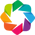

In [17]:
sys.path.append('../../src/codebase/')

from plot import *


In [18]:
%%opts Curve {+axiswise} [width=600, height=200, tools=['hover']] 
plots = []
for i in range(data['J']):
    for j in range(data['J']):
            plots.append(plot_trace(ps['Omega'][:,i,j],
                     true_value=data['Omega'][i,j],
                     title = 'Posterior distribution for Omega(%s,%s)'%(i,j)))
layout = hv.Layout(plots)
layout.cols(1)

:Layout
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_0_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_0_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_0_comma_2_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_0_comma_3_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_0_comma_4_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_0_comma_5_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_1_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_1_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_1_comma_2_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_1_comma_3_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_1_comma_4_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_1_comma_5_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_2_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_2_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_2_comma_2_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_2_comma_3_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_2_comma_4_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_2_comma_5_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_3_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_3_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_3_comma_2_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_3_comma_3_right_parenthesis :Overlay
      .C

In [21]:
%%opts Curve {+axiswise} [width=600, height=200, tools=['hover']] 
plots = []
for i in range(data['J']):
            plots.append(plot_trace(ps['mu'][:,i],
                     true_value=data['mu'][i],
                     title = 'Posterior distribution for mu(%s,%s)'%(i,j)))
layout = hv.Layout(plots)
layout.cols(1)

:Layout
   .Overlay.Posterior_distribution_for_mu_left_parenthesis_0_comma_5_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_mu_left_parenthesis_1_comma_5_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_mu_left_parenthesis_2_comma_5_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_mu_left_parenthesis_3_comma_5_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_mu_left_parenthesis_4_comma_5_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_mu_left_parenthesis_5_comma_5_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)

In [22]:
%%opts Curve {+axiswise} [width=600, height=200, tools=['hover']] 
plots = []
for i in range(data['J']):
    for j in range(data['K']):
        if i==0 and j==1:
            pass
        else:
            plots.append(plot_trace(ps['beta'][:,i,j],
                true_value=data['beta'][i,j],
                title = 'Posterior distribution for beta(%s,%s)'%(i,j)))
layout = hv.Layout(plots)
layout.cols(1)

:Layout
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_0_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_1_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_1_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_2_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_2_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_3_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_3_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_4_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_4_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_5_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_5_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)